## Iris Dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
#importing the dataset

data=pd.read_csv("/Users/brianshimmer/Desktop/Data science training/Day 2/iris/iris dataset/iris.csv")

In [5]:
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### EDA

In [7]:
data.shape

(150, 5)

In [8]:
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#Data splitting

X=data[['sepal length','sepal width','petal length','petal width']]
y=data['class']

### Modelling

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [14]:
X_train

,sepal length,sepal width,petal length,petal width
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.1,1.5,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


In [15]:
y_train

8          Iris-setosa
106     Iris-virginica
76     Iris-versicolor
9          Iris-setosa
89     Iris-versicolor
            ...       
37         Iris-setosa
2          Iris-setosa
33         Iris-setosa
52     Iris-versicolor
3          Iris-setosa
Name: class, Length: 120, dtype: object

In [16]:
#Scaling

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn=KNeighborsClassifier(n_neighbors=3)

In [19]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
#Model evaluation

y_pred=knn.predict(X_test_scaled)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print('Confusion matrix:',confusion_matrix(y_test,y_pred))
print('Classification report:', classification_report(y_test, y_pred))

Confusion matrix: [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
Classification report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



In [23]:
from sklearn.metrics import accuracy_score

In [24]:
k_range=range(1,21)
accuracy_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred=knn.predict(X_test_scaled)
    acc=accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

for k, acc in zip(k_range, accuracy_scores):
    print(f"k={k}: Accuracy={acc:.4f}")

k=1: Accuracy=0.9667
k=2: Accuracy=0.9333
k=3: Accuracy=0.9333
k=4: Accuracy=0.9333
k=5: Accuracy=0.9333
k=6: Accuracy=0.9333
k=7: Accuracy=0.9667
k=8: Accuracy=0.9333
k=9: Accuracy=0.9667
k=10: Accuracy=0.9667
k=11: Accuracy=0.9667
k=12: Accuracy=0.9667
k=13: Accuracy=0.9667
k=14: Accuracy=0.9333
k=15: Accuracy=0.9667
k=16: Accuracy=0.9667
k=17: Accuracy=0.9667
k=18: Accuracy=0.9667
k=19: Accuracy=0.9667
k=20: Accuracy=0.9667


In [25]:
best_k=k_range[accuracy_scores.index(max(accuracy_scores))]
print(f"\n Best k is {best_k} with accuracy ={max(accuracy_scores):.4f}")


 Best k is 1 with accuracy =0.9667


In [26]:
#Applying PCA

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_train_scaled)

In [27]:
X_test_pca=pca.transform(X_test_scaled)

In [28]:
print("Original shape:",X_train_scaled.shape)
print("After pca shape:",X_pca.shape)

Original shape: (120, 4)
After pca shape: (120, 2)


In [29]:
#Clustering

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=42)

In [30]:
cluster_labels=kmeans.labels_

In [31]:
print("Cluster labels:\n", kmeans.cluster_centers_)

Cluster labels:
 [[-1.02298939  0.80740532 -1.30158198 -1.25114722]
 [ 1.23022436  0.2595902   1.06235888  1.08325027]
 [ 0.03234159 -0.8458979   0.3764124   0.32045583]]


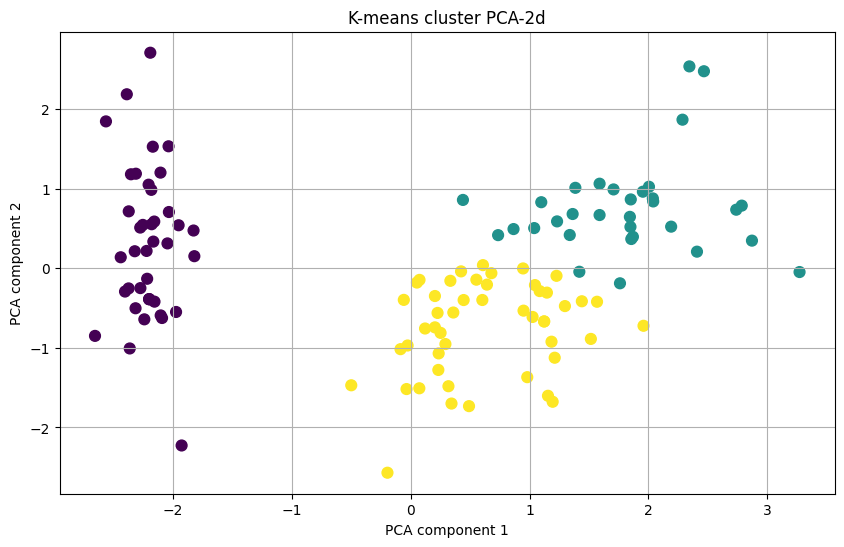

In [32]:
#visualising the clusters using pca

import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=cluster_labels,cmap="viridis",s=60)
plt.title("K-means cluster PCA-2d")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.grid(True)
plt.show()

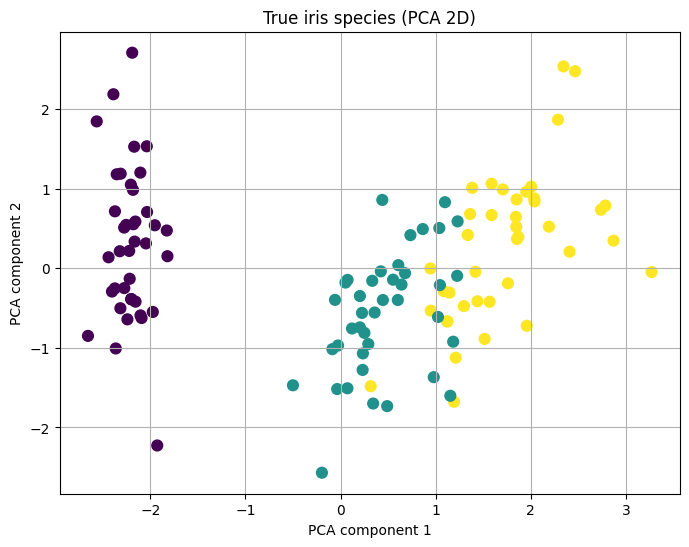

In [66]:
# scatter plot of true labels

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],       
    X_pca[:, 1],       
    c=y_train.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}) if y_train.dtype=='object' else y_train,
    cmap='viridis',    
    s=60
)
plt.title("True iris species (PCA 2D)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.grid(True)
plt.show()